In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
raw = pd.read_csv("../data/Data.csv")

In [3]:
raw.head()

,Unnamed: 0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,...,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,LAB,Response
0,1,0.0,0.0,0.009140,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,177.331194,0.971717,0.430281,11.980651,0.0,A,60.062861
1,2,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,86.098721,0.0,184.539779,1.040365,0.477488,13.452968,0.0,B,19.350732
2,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,184.230167,0.0,181.902155,0.961431,0.412368,12.952387,0.0,C,20.227076
3,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,197.748133,1.125438,0.533366,10.863085,0.0,B,38.798884
4,5,0.0,0.0,0.003537,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,176.839320,0.0,168.942908,0.981250,0.466690,11.472632,0.0,B,58.174574


In [4]:
raw.describe()

,Unnamed: 0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,...,Group13_57,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,Response
count,6360.000000,6360.000000,6360.000000,4420.000000,6359.000000,6354.000000,6358.000000,6355.000000,6359.000000,6360.000000,...,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000
mean,3180.500000,0.001366,0.001741,0.007894,0.000502,0.000788,0.003949,0.001320,0.003386,0.000054,...,0.001576,0.000043,70.669029,0.003297,172.477451,0.997631,0.471405,10.815665,0.850843,38.657683
std,1836.118188,0.108920,0.044628,0.009345,0.013817,0.016883,0.088927,0.025589,0.080741,0.002789,...,0.021805,0.001122,77.979666,0.044472,24.239799,0.094840,0.082216,3.376337,7.635141,12.654940
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.681269,0.289288,0.000000,0.000000,0.000000
25%,1590.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,170.534912,0.945808,0.422798,8.866556,0.000000,29.704819
50%,3180.500000,0.000000,0.000000,0.003494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.265122,0.000000,175.445194,0.980674,0.449820,10.878518,0.000000,39.214501
75%,4770.250000,0.000000,0.000000,0.015044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,158.987207,0.000000,182.080545,1.039523,0.499197,11.973781,0.000000,47.723999
max,6360.000000,8.686335,1.648436,0.050277,0.512569,0.491380,2.355276,0.731193,2.958337,0.157241,...,0.440788,0.042260,218.424630,0.853732,226.101243,1.582509,1.057504,27.429051,85.841716,100.000000


In [5]:
raw.isnull().sum()

Unnamed: 0         0
ingredient_1       0
ingredient_2       0
ingredient_3    1940
ingredient_4       1
                ... 
Group13_63         0
Group13_64         0
Group13_65         0
LAB                0
Response           0
Length: 811, dtype: int64

In [6]:
raw.isnull().sum().sum()

11694

In [7]:
# blind replace with 0
raw.fillna(0, inplace=True)

In [8]:
raw.isnull().sum().sum()

0

In [9]:
raw.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
raw.describe()

,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,...,Group13_57,Group13_58,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,Response
count,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,...,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000,6360.000000
mean,0.001366,0.001741,0.005486,0.000502,0.000787,0.003948,0.001319,0.003386,0.000054,0.000419,...,0.001576,0.000043,70.669029,0.003297,172.477451,0.997631,0.471405,10.815665,0.850843,38.657683
std,0.108920,0.044628,0.008597,0.013816,0.016875,0.088913,0.025579,0.080734,0.002789,0.015540,...,0.021805,0.001122,77.979666,0.044472,24.239799,0.094840,0.082216,3.376337,7.635141,12.654940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.681269,0.289288,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,170.534912,0.945808,0.422798,8.866556,0.000000,29.704819
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.265122,0.000000,175.445194,0.980674,0.449820,10.878518,0.000000,39.214501
75%,0.000000,0.000000,0.009876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,158.987207,0.000000,182.080545,1.039523,0.499197,11.973781,0.000000,47.723999
max,8.686335,1.648436,0.050277,0.512569,0.491380,2.355276,0.731193,2.958337,0.157241,0.732679,...,0.440788,0.042260,218.424630,0.853732,226.101243,1.582509,1.057504,27.429051,85.841716,100.000000


In [11]:
raw = raw.rename(columns={'Response': 'targetVar'})

In [12]:
categorical_columns = ['LAB']
raw[categorical_columns] = raw[categorical_columns].astype('category')

In [13]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(raw.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [14]:
if targetCol == totCol:
    X_raw = raw.iloc[:,0:totAttr]
    y_raw = raw.iloc[:,totAttr]
else:
    X_raw = raw.iloc[:,1:totCol]
    y_raw = raw.iloc[:,0]

print("Total shape: {} X shape: {} y shape: {}".format(raw.shape, X_raw.shape, y_raw.shape))

Total shape: (6360, 810) X shape: (6360, 809) y shape: (6360,)


In [15]:
X_raw = pd.get_dummies(X_raw)
print(X_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Columns: 811 entries, ingredient_1 to LAB_C
dtypes: float64(808), uint8(3)
memory usage: 39.2 MB
None


# Splitting into test train and validation

In [16]:
# Split the data further into training, validation, and test datasets
test_size = 0.2
test_size_validation = 0.1
randomseed = 12345

X_train_val, X_test_df, y_train_val, y_test_df = train_test_split(X_raw, y_raw, test_size=test_size, random_state=randomseed)
X_train_df, X_validation_df, y_train_df, y_validation_df = train_test_split(X_train_val, y_train_val, test_size=test_size_validation, random_state=randomseed)
print("X_train_df.shape: {} y_train_df.shape: {}".format(X_train_df.shape, y_train_df.shape))
print("X_validation_df.shape: {} y_validation_df.shape: {}".format(X_validation_df.shape, y_validation_df.shape))
print("X_test_df.shape: {} y_test_df.shape: {}".format(X_test_df.shape, y_test_df.shape))

X_train_df.shape: (4579, 811) y_train_df.shape: (4579,)
X_validation_df.shape: (509, 811) y_validation_df.shape: (509,)
X_test_df.shape: (1272, 811) y_test_df.shape: (1272,)


In [17]:
# scaling
columns_to_scale = X_train_df.columns[X_train_df.dtypes == 'float64'].tolist()
scaler = preprocessing.StandardScaler()
X_train_df[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])

# do the same to the validation set
scaled_features = scaler.transform(X_validation_df[columns_to_scale])
X_validation_df.loc[:,tuple(columns_to_scale)] = scaled_features

scaled_features = scaler.transform(X_test_df[columns_to_scale])
X_test_df.loc[:,tuple(columns_to_scale)] = scaled_features

<ipython-input-17-e897c2b08841>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_df[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])
C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [18]:
X_train_df.head()

,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,...,Group13_59,Group13_60,Group13_61,Group13_62,Group13_63,Group13_64,Group13_65,LAB_A,LAB_B,LAB_C
2820,0.0,-0.037115,0.712768,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.345579,-0.070617,-0.045154,-0.057585,0.156290,-0.681774,-0.112395,0,1,0
5304,0.0,-0.037115,-0.473920,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.897430,-0.070617,-0.040850,-0.634499,-0.688080,0.214289,-0.112395,0,1,0
1887,0.0,-0.037115,-0.639753,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.330444,-0.070617,0.266605,0.158301,0.054966,-0.005877,-0.112395,1,0,0
4485,0.0,-0.037115,-0.639753,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,0.795570,-0.070617,0.089735,-0.054156,-0.206578,0.874604,-0.112395,0,1,0
964,0.0,-0.037115,-0.543481,-0.040261,-0.042598,-0.049052,-0.047535,-0.043071,-0.020903,-0.024827,...,-0.897430,-0.070617,-0.477494,-1.813477,-1.475231,-0.249065,-0.112395,0,1,0


## Attribute Importance Ranking

In [19]:
# Feature Importance with Gradient Boosting Regressor
X_impVal = X_train_df.values
y_impVal = y_train_df.values.ravel()
model = GradientBoostingRegressor()
model.fit(X_impVal, y_impVal)
importanceScore = model.feature_importances_
attributeList = X_train_df.columns.tolist()
attributeImportance = pd.DataFrame({'attribute': attributeList, 'importance': importanceScore})
rankedAttributes = attributeImportance.sort_values('importance', ascending=False)
print(rankedAttributes)

          attribute  importance
486       Group1_11    0.569850
526       Group2_20    0.073474
745       Group13_3    0.043404
509        Group2_3    0.038112
484        Group1_9    0.034432
..              ...         ...
298  ingredient_299    0.000000
299  ingredient_300    0.000000
300  ingredient_301    0.000000
301  ingredient_302    0.000000
405  ingredient_406    0.000000

[811 rows x 2 columns]


<BarContainer object of 811 artists>

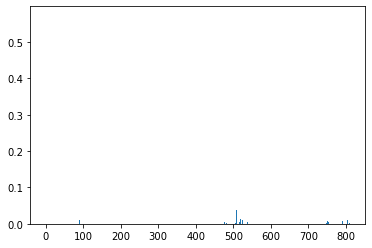

In [20]:
plt.bar([i for i in range(len(importanceScore))], importanceScore)

In [21]:
# Set the importance threshold and calculate the list of attributes that don't contribute to the importance threshold
importanceSum = sum(importanceScore)
maxThreshold = 0.99
i = 0
accumWeight = 0
exit_now = False
while ((i < totAttr) and (not exit_now)) :
    accumWeight = accumWeight + (rankedAttributes.iloc[i]['importance']/importanceSum)
    if (accumWeight >= maxThreshold) :
        exit_now = True
    else :
        i = i + 1
print('Number of attributes contributed to the importance threshold:'+str(i))
lowAttributes = rankedAttributes.iloc[(i):(totAttr),]['attribute'].tolist()
print('Number of attributes found to be of low importance:',len(lowAttributes))
print(lowAttributes)


Number of attributes contributed to the importance threshold:99
Number of attributes found to be of low importance: 710
['Group1_15', 'Group13_44', 'ingredient_297', 'Group2_14', 'ingredient_305', 'Group2_4', 'ingredient_209', 'ingredient_13', 'Group9_51', 'Group2_6', 'ingredient_350', 'Group13_13', 'ingredient_283', 'Group9_46', 'ingredient_50', 'ingredient_197', 'Group2_44', 'Group8_14', 'ingredient_79', 'Group2_33', 'ingredient_268', 'Group2_45', 'Group3_3', 'Group8_18', 'Group13_48', 'Group13_32', 'Group9_56', 'ingredient_351', 'Group2_29', 'ingredient_466', 'Group9_48', 'ingredient_11', 'Group13_65', 'Group13_18', 'Group10_8', 'Group13_39', 'Group9_37', 'Group8_8', 'ingredient_460', 'Group13_38', 'ingredient_86', 'Group9_24', 'Group8_7', 'Group9_61', 'ingredient_6', 'Group3_11', 'Group8_19', 'ingredient_471', 'Group11_5', 'ingredient_277', 'ingredient_446', 'ingredient_456', 'ingredient_55', 'ingredient_120', 'Group8_9', 'ingredient_464', 'ingredient_360', 'ingredient_247', 'ingre

LAB C is deemed to be an important attribute

In [22]:
# Removing the unselected attributes from the training and validation dataframes
X_train_df.drop(labels=lowAttributes, axis=1, inplace=True)
X_test_df.drop(labels=lowAttributes, axis=1, inplace=True)
X_validation_df.drop(labels=lowAttributes, axis=1, inplace=True)

C:\Users\Kiera\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
# Finalize the training and validation datasets for the modeling activities
X_train = X_train_df.to_numpy()
y_train = y_train_df.ravel()
X_validation = X_validation_df.to_numpy()
y_validation = y_validation_df.ravel()
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_validation.shape: {} y_validation.shape: {}".format(X_validation.shape, y_validation.shape))

X_train.shape: (4579, 101) y_train.shape: (4579,)
X_validation.shape: (509, 101) y_validation.shape: (509,)


In [24]:
# save it as a file
file_name = "../data/lubrizol-AIR.h5"
X_train_df.to_hdf(file_name, key='X_train', mode='w', format='t')
X_test_df.to_hdf(file_name, key='X_test', append=True, format='t')
X_validation_df.to_hdf(file_name, key='X_validation', append=True, format='t')
y_train_df.to_hdf(file_name, key='y_train', append=True, format='t')
y_test_df.to_hdf(file_name, key='y_test', append=True, format='t')
y_validation_df.to_hdf(file_name, key='y_validation', append=True, format='t')

In [25]:
X_test = X_test_df.to_numpy()
y_test = y_test_df.ravel()
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_test.shape: (1272, 101) y_test.shape: (1272,)


In [26]:
## Regression Modelling

MAE: 5.481676983035529
R^2: 0.6650943440405641


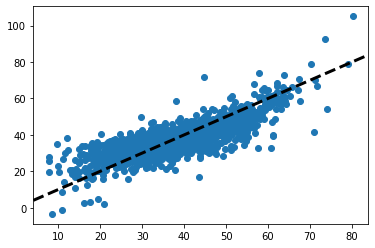

In [58]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('R^2: {0}'.format(r2))
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [ ]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('R^2: {0}'.format(r2))
plt.scatter(y_test, y_hat)
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 46.540512070677465
R^2: -463.5933176459331


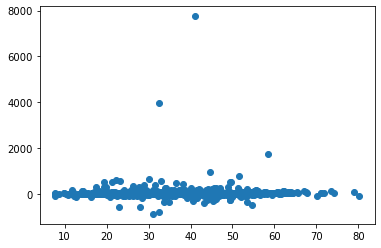

In [59]:
theil = linear_model.TheilSenRegressor(n_jobs=-1)
theil.fit(X_train, y_train)
# evaluate model
y_hat = theil.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('R^2: {0}'.format(r2))
plt.scatter(y_test, y_hat)

MAE: 4719035056238.861
R^2: -1.9270321311943242e+25


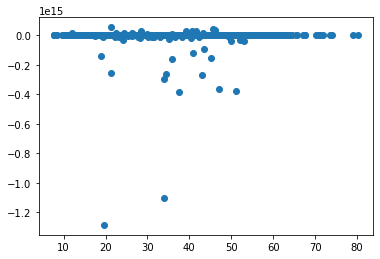

In [61]:
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train, y_train)
# evaluate model
y_hat = ransac.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('R^2: {0}'.format(r2))
plt.scatter(y_test, y_hat)

# Testing Huber Regression Model

C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 5.39809430547776 R^2 0.6632769865905823


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 5.409622397674371 R^2 0.6635236923001757


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 5.421841695949698 R^2 0.6624767889130376


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 5.42014558576178 R^2 0.6625549821869847


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 5.418238030427208 R^2 0.6627707812522032
MAE: 5.425284992349594 R^2 0.6624942452090266


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


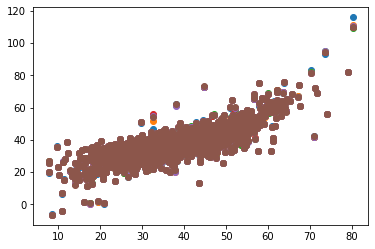

In [64]:
# Testing maximum iteration changes
for max_iterations in [100, 200, 300, 400, 500, 1000]:

    huber = linear_model.HuberRegressor(max_iter=max_iterations)
    huber.fit(X_train, y_train)
    # evaluate model
    y_hat = huber.predict(X_test)
    # evaluate predictions
    mae = mean_absolute_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    print('MAE: {0} R^2 {1}'.format(mae, r2))
    plt.scatter(y_test, y_hat)

C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1 MAE: 5.431382934794893 R^2 0.6573895604939313


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1.05 MAE: 5.431412600944963 R^2 0.6579661450747576


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1.1 MAE: 5.428010351986312 R^2 0.6593176730542093


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1.2 MAE: 5.4198484029807705 R^2 0.6612727721715779


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1.3 MAE: 5.412377368467777 R^2 0.6628653132655993


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1.4 MAE: 5.413756007606536 R^2 0.663925515347354


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 1.5 MAE: 5.414788061009244 R^2 0.6648807216219554


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 2 MAE: 5.435794964795346 R^2 0.6664402405112368


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 3 MAE: 5.461872870619113 R^2 0.666536674844204


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RB: 4 MAE: 5.470309211102736 R^2 0.6663716276470587
RB: 5 MAE: 5.469693404406686 R^2 0.6662655778530535


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


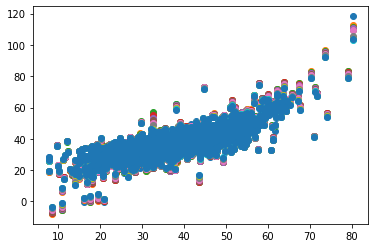

In [67]:
# test robustness?
for robustness in [1, 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5]:
    huber = linear_model.HuberRegressor(epsilon=robustness, max_iter=200)
    huber.fit(X_train, y_train)
    # evaluate model
    y_hat = huber.predict(X_test)
    # evaluate predictions
    mae = mean_absolute_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    print('RB: {0} MAE: {1} R^2 {2}'.format(robustness, mae, r2))
    plt.scatter(y_test, y_hat)